In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
RAW_FILE = "../data/processed/merged_dataset.jsonl"
CLEAN_FILE = "../data/processed/preprocessed_dataset.jsonl"

sns.set(style="whitegrid", palette="husl")

In [3]:
def load_jsonl(path, n=5):
    """Preview first n records from a JSONL file."""
    data = []
    if not os.path.exists(path):
        print(f"⚠️ File not found: {path}")
        return pd.DataFrame()

    with open(path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if i >= n:
                break
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                continue
    return pd.DataFrame(data)


In [4]:
print(" Previewing RAW dataset")
raw_preview = load_jsonl(RAW_FILE, 5)
display(raw_preview)

print(" Previewing CLEANED dataset")
clean_preview = load_jsonl(CLEAN_FILE, 5)
display(clean_preview)


 Previewing RAW dataset


,text,source_file
0,"<?xml version=""1.0"" encoding=""UTF-8""?><!DOCTYP...",APPLE_INC10-K.txt
1,UNITED STATESSECURITIES AND EXCHANGE COMMISSIO...,Tesla_10-Q.pdf
2,"TESLA, INC.FORM 10-Q FOR THE QUARTER ENDED JUN...",Tesla_10-Q.pdf
3,Table of ContentsForward-Looking StatementsThe...,Tesla_10-Q.pdf
4,Table of ContentsPART I. FINANCIAL INFORMATION...,Tesla_10-Q.pdf


 Previewing CLEANED dataset


,text,source_file
0,XBRL Viewer / let docsInInstance instanceNames...,APPLE_INC10-K.txt
1,UNITED STATESSECURITIES AND EXCHANGE COMMISSIO...,Tesla_10-Q.pdf
2,"TESLA, INC.FORM 10-Q FOR THE QUARTER ENDED JUN...",Tesla_10-Q.pdf
3,Table of ContentsForward-Looking StatementsThe...,Tesla_10-Q.pdf
4,Table of ContentsPART I. FINANCIAL INFORMATION...,Tesla_10-Q.pdf


Load JSONL Preview

In [5]:
def load_all_jsonl(path, max_records=None):
    data = []
    with open(path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if max_records and i >= max_records:
                break
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                continue
    return pd.DataFrame(data)

raw_df = load_all_jsonl(RAW_FILE)
clean_df = load_all_jsonl(CLEAN_FILE)

print(f"RAW records: {len(raw_df)}")
print(f"CLEANED records: {len(clean_df)}")


RAW records: 23474
CLEANED records: 23474


Load Full Data

In [6]:
sample_idx = 4  

print(" Before Cleaning:\n")
print(raw_df.iloc[sample_idx]["text"][:400])

print("\n After Cleaning:\n")
print(clean_df.iloc[sample_idx]["text"][:400])

 Before Cleaning:

Table of ContentsPART I. FINANCIAL INFORMATIONITEM 1. FINANCIAL STATEMENTSTesla, Inc.Consolidated Balance Sheets(in millions, except per share data)(unaudited)June 30, December 31,2025 2024AssetsCurrent assetsCash and cash equivalents $ 15,587 $ 16,139Short-term investments 21,195 20,424Accounts receivable, net 3,838 4,418Inventory 14,570 12,017Prepaid expenses and other current assets 5,943 5,362

 After Cleaning:

Table of ContentsPART I. FINANCIAL INFORMATIONITEM 1. FINANCIAL STATEMENTSTesla, Inc.Consolidated Balance Sheets in millions, except per share data unaudited June 30, December 31,2025 2024AssetsCurrent assetsCash and cash equivalents CURRENCY_SYMBOL 15,587 CURRENCY_SYMBOL 16,139Short-term investments 21,195 20,424Accounts receivable, net 3,838 4,418Inventory 14,570 12,017Prepaid expenses and other


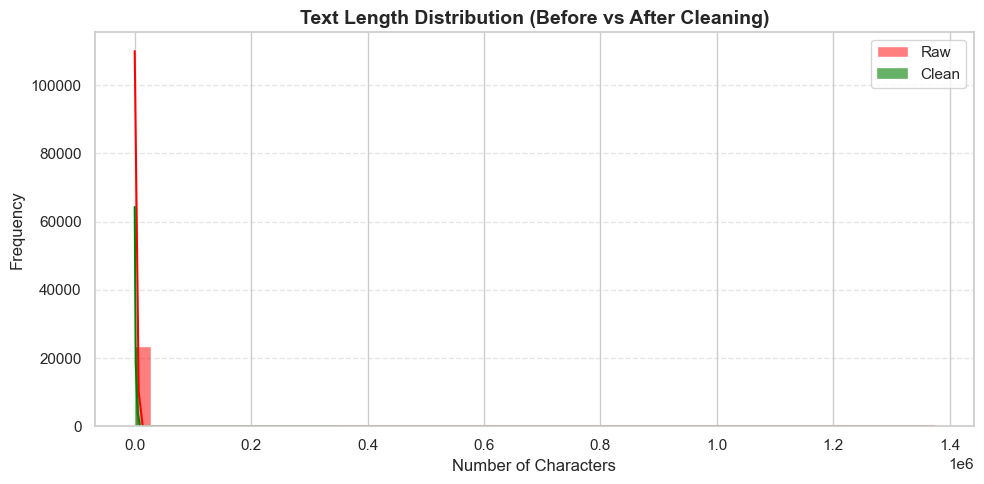

In [7]:
# Compute character length

raw_df["char_len"] = raw_df["text"].apply(lambda x: len(str(x)))
clean_df["char_len"] = clean_df["text"].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 5))
sns.histplot(raw_df["char_len"], bins=50, kde=True, color="red", label="Raw")
sns.histplot(clean_df["char_len"], bins=50, kde=True, color="green", alpha=0.6, label="Clean")

plt.legend()
plt.title("Text Length Distribution (Before vs After Cleaning)", fontsize=14, weight='bold')
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [8]:
raw_duplicates = raw_df["text"].duplicated().sum()
clean_duplicates = clean_df["text"].duplicated().sum()

print(f" Duplicates in RAW dataset: {raw_duplicates}")
print(f" Duplicates in CLEANED dataset: {clean_duplicates}")


 Duplicates in RAW dataset: 0
 Duplicates in CLEANED dataset: 3


In [9]:
print("Missing values in RAW:")
display(raw_df.isna().sum())

print("Missing values in CLEANED:")
display(clean_df.isna().sum())


Missing values in RAW:


text           0
source_file    0
char_len       0
dtype: int64

Missing values in CLEANED:


text           0
source_file    0
char_len       0
dtype: int64

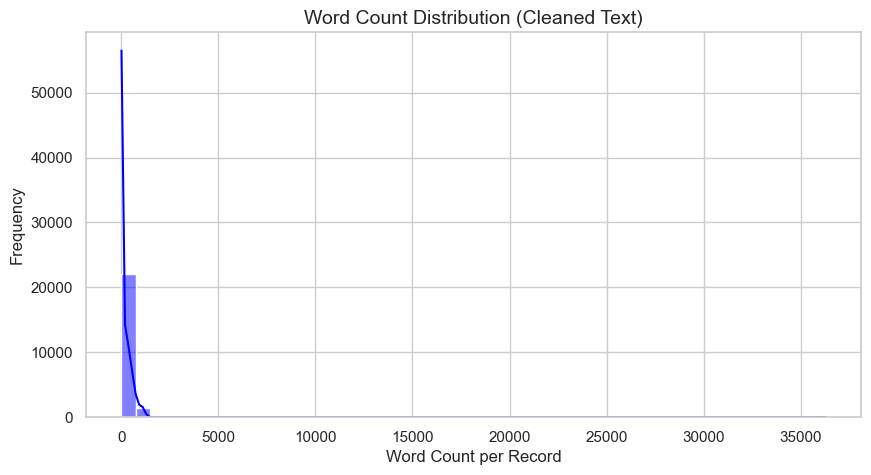

In [10]:
clean_df["word_count"] = clean_df["text"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

plt.figure(figsize=(10,5))
sns.histplot(clean_df["word_count"], bins=50, kde=True, color="blue")
plt.title("Word Count Distribution (Cleaned Text)", fontsize=14)
plt.xlabel("Word Count per Record")
plt.ylabel("Frequency")
plt.show()
